# Research Question
## Does having a seizure decrease total brian volume?


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests # library to handle requests
from bs4 import BeautifulSoup
pd.options.display.max_columns=100

In [2]:
# get the response in the form of html
wikiurl="https://wiki.socr.umich.edu/index.php/SOCR_Data_N46_TBI_ROI_Volumes#Demographic_and_Clinical_Data"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [3]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
data_table=soup.find_all('table',{'class':"wikitable"})

In [4]:
df=pd.read_html(str(data_table))
# convert list to dataframe
df1=pd.DataFrame(df[0])
df2=pd.DataFrame(df[1])


In [5]:
new_header = df1.iloc[0] #grab the first row for the header
df1 = df1[1:] #take the data less the header row
df1.columns = new_header


In [6]:
##Removing columns that arent relevant
df1.drop(df1.columns[2:9],axis=1,inplace=True)
df1.drop(df1.columns[5:8],axis=1,inplace=True)
df1['ID'] = df1['ID'].astype(str).astype(int)
df2.drop(df2.columns[5:],axis=1,inplace=True)

In [8]:
##Merge the dataframes based on the patient ID
df_fin = pd.merge(df1, df2, how="inner", on="ID")
df_fin.rename(columns={"sex(m0f1)":"sex","skull.fx":"skull_inj","temp.injury":"temp_inj","acute.sz":"seizure_acute","late.sz":"seizure_late",
                       "ever.sz":"seizure_ever","TBV":"total_intercranial_volume","GM":"total_gray_matter_volume","WM":"total_white_matter_volume",
                       "CSF":" total_cerebro_spinal_fluid"}, inplace=True)

df_fin

,ID,age,skull_inj,temp_inj,surgery,seizure_acute,seizure_late,seizure_ever,total_intercranial_volume,total_gray_matter_volume,total_white_matter_volume,total_cerebro_spinal_fluid
0,2,55,1,1,1,0,1,1,1458326.000,400182.0000,737989.0000,320155.0000
1,3,24,1,0,0,0,0,0,1317087.125,640414.4375,532688.3750,143984.2500
2,4,57,1,1,1,0,0,0,1181208.000,607794.3750,415649.0625,157764.6406
3,5,54,0,1,1,0,0,0,1222690.875,408293.1563,644690.1250,169707.6406
4,7,21,1,0,1,0,0,0,1276169.000,598918.8750,514287.0625,162963.1250
5,9,30,1,1,1,0,1,1,1262723.000,518852.0000,533773.0000,210098.0000
6,10,38,1,1,1,0,1,1,1177401.125,563714.9375,438628.2500,175057.9531
7,11,43,1,0,1,0,0,0,1317000.875,561232.9375,615427.2500,140340.5938
8,13,21,1,0,1,0,1,1,1541888.125,674973.2500,650828.6875,216086.2188
9,14,35,1,1,0,1,1,1,1148906.000,548720.0000,458865.5000,141320.5000


In [9]:
## Sort by age
df_fin.sort_values(by="age", axis=0, ascending=True, inplace=True)

In [10]:
##Convert columns to int
df_fin['age'] = df_fin['age'].astype(str).astype(int)
df_fin['seizure_ever'] = df_fin['seizure_ever'].astype(str).astype(int)

df_fin

,ID,age,skull_inj,temp_inj,surgery,seizure_acute,seizure_late,seizure_ever,total_intercranial_volume,total_gray_matter_volume,total_white_matter_volume,total_cerebro_spinal_fluid
13,19,18,1,1,1,0,1,1,1285788.500,441545.0000,688279.2500,155964.2500
21,35,19,0,0,0,0,0,0,1528446.000,647185.0000,643293.0000,237968.0000
15,23,20,1,1,1,0,1,1,1175587.750,455001.2500,538438.2500,182148.2500
4,7,21,1,0,1,0,0,0,1276169.000,598918.8750,514287.0625,162963.1250
8,13,21,1,0,1,0,1,1,1541888.125,674973.2500,650828.6875,216086.2188
1,3,24,1,0,0,0,0,0,1317087.125,640414.4375,532688.3750,143984.2500
22,38,25,0,0,1,1,0,1,1409718.000,427426.0000,551786.0000,430506.0000
30,46,25,0,1,0,0,0,0,1321693.000,742213.0000,137475.0000,442005.0000
26,42,29,1,0,1,0,1,1,1274869.000,751131.0000,224085.0000,299653.0000
5,9,30,1,1,1,0,1,1,1262723.000,518852.0000,533773.0000,210098.0000


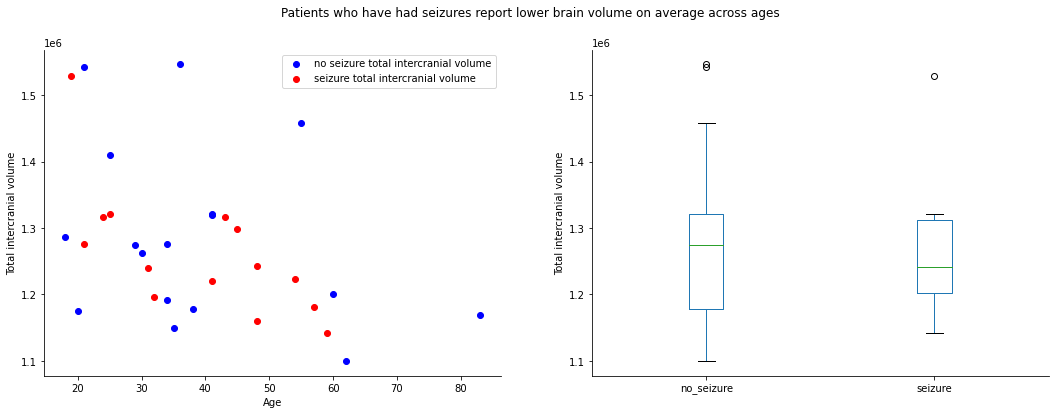

In [76]:
#Create a subset of the data between patients who have had seizures and those who have not.
no_seiz = df_fin['total_intercranial_volume'][df_fin['seizure_ever'] ==0]
seiz = df_fin['total_intercranial_volume'][df_fin['seizure_ever'] ==1]
df_box = pd.concat([seiz, no_seiz], axis=1)
df_box.columns = ["no_seizure","seizure"]

## Create subplot for a scatter plot and boxplot
fig, (ax, bx) = plt.subplots(1, 2,figsize=(18,6))
fig.suptitle('Patients who have had seizures report lower brain volume on average across ages')

##Create boxplot
df_box.boxplot(grid=False)
bx.spines.right.set_visible(False)
bx.spines.top.set_visible(False)
bx.set(ylabel="Total intercranial volume")

##Add the age column to the dataframe
df_box['age'] = df_fin['age']

##Plot scatterplot over age with having a seizure or not being color coded
colors = {1:'tab:blue', 0:'tab:orange'}
ax.scatter(df_box['age'], df_box['no_seizure'], c="blue", label="no seizure total intercranial volume")
ax.scatter(df_box['age'], df_box['seizure'], c="red", label="seizure total intercranial volume")
ax.legend(loc="upper right")
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set(xlabel="Age", ylabel="Total intercranial volume")

plt.savefig('volume_seizure.png')
